In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
fifamach=pd.read_csv('unsupervized.csv')
fifamach.head()

,ID,Name,Position,Age,Height(cm),Weight(kgs),Preferred Foot,Weak Foot,Nationality,Continent,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,RF,31,173.727522,72.137028,Left,4.0,Argentina,America,...,64,61,61,61,64,59,47,47,47,59
1,20801,Cristiano Ronaldo,ST,33,188.966778,83.025636,Right,4.0,Portugal,Europe,...,65,61,61,61,65,61,53,53,53,61
2,190871,Neymar Jr,LW,26,179.823225,68.053800,Right,5.0,Brazil,America,...,65,60,60,60,65,60,47,47,47,60
3,193080,De Gea,GK,27,195.062481,76.220256,Right,3.0,Spain,Europe,...,50,50,50,50,50,50,50,50,50,50
4,192985,K. De Bruyne,RCM,27,155.745200,69.868568,Right,5.0,Belgium,Europe,...,77,77,77,77,77,73,66,66,66,73


In [3]:
fifamach.describe()

,ID,Age,Height(cm),Weight(kgs),Weak Foot,Inter_Rep,year_joined,month_joined,day_joined,Jersey,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,176.687304,75.307016,2.947438,1.112924,2016.676498,5.299665,9.082880,19.508046,...,56.652881,56.043555,56.043555,56.043555,56.652881,56.027297,54.971659,54.971659,54.971659,56.027297
std,29965.244204,4.669943,13.644282,7.065593,0.659591,0.393554,2.135431,3.071800,9.962116,15.935210,...,8.760726,9.720149,9.720149,9.720149,8.760726,9.213375,11.156382,11.156382,11.156382,9.213375
min,16.000000,16.000000,155.440415,49.906120,1.000000,1.000000,1991.000000,1.000000,1.000000,1.000000,...,30.000000,28.000000,28.000000,28.000000,30.000000,29.000000,25.000000,25.000000,25.000000,29.000000
25%,200315.500000,21.000000,155.745200,69.868568,3.000000,1.000000,2016.000000,1.000000,1.000000,8.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,47.000000,47.000000,47.000000,50.000000
50%,221759.000000,25.000000,179.823225,74.859180,3.000000,1.000000,2017.000000,7.000000,3.000000,17.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,55.000000,55.000000,55.000000,56.000000
75%,236529.500000,28.000000,185.918927,79.849792,3.000000,1.000000,2018.000000,7.000000,16.000000,26.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,64.000000,64.000000,64.000000,63.000000
max,246620.000000,45.000000,210.301737,110.247156,5.000000,5.000000,2019.000000,12.000000,31.000000,99.000000,...,85.000000,87.000000,87.000000,87.000000,85.000000,84.000000,87.000000,87.000000,87.000000,84.000000


In [4]:
fifamach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 90 columns):
ID                    18207 non-null int64
Name                  18207 non-null object
Position              18207 non-null object
Age                   18207 non-null int64
Height(cm)            18207 non-null float64
Weight(kgs)           18207 non-null float64
Preferred Foot        18207 non-null object
Weak Foot             18207 non-null float64
Nationality           18207 non-null object
Continent             18207 non-null object
Inter_Rep             18207 non-null float64
Club                  18207 non-null object
Joined                18207 non-null object
year_joined           18207 non-null int64
month_joined          18207 non-null int64
day_joined            18207 non-null int64
Jersey                18207 non-null float64
Overall               18207 non-null int64
Potential             18207 non-null int64
Difference            18207 non-null int64
Evolution     

In [5]:
#Player value per position
positions = {
    'Forward' : ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'],
    'Midfield' : ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'],
    'Defense' : ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'],
    'Goalkeeper' : ['GK'],
}
count_position = {'Forward': 0, 'Midfield': 0, 'Defense': 0, 'Goalkeeper': 0}
players_position = {'Forward': 0, 'Midfield': 0, 'Defense': 0, 'Goalkeeper': 0}
position_avg = {'Forward': 0, 'Midfield': 0, 'Defense': 0, 'Goalkeeper': 0}

def add_values(series):
    already_counted = [0, 0, 0, 0]
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    value = series[1]

    #Count the players per position category
    index = 0
    for preferred_position in preferred_position_list:
        for position in positions:
            if preferred_position in positions[position]:
                if(not already_counted[index]):
                    count_position[position] += value
                    players_position[position] += 1                    
                    already_counted[index] = 1
                    
position_value = fifamach[['Position', 'Value(€M)']]
position_value.apply(add_values, 1)

0        None
1        None
2        None
3        None
4        None
         ... 
18202    None
18203    None
18204    None
18205    None
18206    None
Length: 18207, dtype: object

In [6]:
cols=[c for c in fifamach.columns.values if c not in ['Name', 'Position', 'Preferred Foot','Nationality', 'Continent',
                                                      'Club', 'Joined', 'Contract_Expiry','Work Rate', 'Work RAttack', 
                                                      'Work RDefense','Evolution', 'ID']]

In [7]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit(fifamach[cols])
fifamach['labels']=clusters.labels_

In [8]:
len(clusters.cluster_centers_)

4

In [9]:
clusters.cluster_centers_

array([[2.49930283e+01, 1.76634658e+02, 7.51749146e+01, 2.91279178e+00,
        1.04400871e+00, 2.01676365e+03, 5.18680361e+00, 8.87992530e+00,
        2.00245254e+01, 6.47400560e+01, 7.01040149e+01, 5.36395892e+00,
        1.04312730e+06, 8.28565204e+03, 1.53373607e+06, 1.56163654e+03,
        2.27942733e+00, 5.69996864e+01, 5.10747073e+01, 5.37508299e+01,
        4.52782620e+01, 4.73291212e+01, 6.25849470e+01, 6.37904436e+01,
        6.38891313e+01, 6.20495212e+01, 6.47178322e+01, 6.01492161e+01,
        5.36092006e+01, 5.66070174e+01, 5.45811834e+01, 4.54698112e+01,
        4.82774981e+01, 5.16968094e+01, 6.34795142e+01, 5.68685414e+01,
        4.81446150e+01, 4.39110765e+01, 6.45470459e+01, 5.11283729e+01,
        4.61959239e+01, 4.66219419e+01, 4.47475723e+01, 1.67916327e+01,
        4.12424297e+01, 4.53683286e+01, 4.13356633e+01, 1.65671831e+01,
        1.64235381e+01, 1.65493724e+01, 1.68976111e+01, 5.55959539e+01,
        5.55959539e+01, 5.55959539e+01, 5.66305633e+01, 5.629953

In [10]:
preds=clusters.fit_predict(fifamach[cols])
len(preds)

18207

In [11]:
distancias=clusters.fit_transform(fifamach[cols])
len(distancias)

18207

In [12]:
import numpy as np

distancias[np.where(preds==1)[0]]

array([[9.85241742e+07, 4.23127438e+07, 4.47018355e+07, 8.13844676e+07],
       [7.14642365e+07, 1.58584343e+07, 7.20863579e+07, 5.43728529e+07],
       [5.02842427e+07, 7.00353107e+06, 9.30862971e+07, 3.31992605e+07],
       ...,
       [4.12879532e+07, 1.52634041e+07, 1.01985870e+08, 2.42033331e+07],
       [3.89170863e+07, 1.74110811e+07, 1.04281698e+08, 2.17936027e+07],
       [4.81649939e+07, 1.03559175e+07, 9.55373543e+07, 3.12288478e+07]])

In [13]:
#fifamach['cluster']=preds
#fifamach.cluster.unique()

In [14]:
fifamach[fifamach.labels==2].head()

,ID,Name,Position,Age,Height(cm),Weight(kgs),Preferred Foot,Weak Foot,Nationality,Continent,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,labels
28,198710,J. Rodríguez,LAM,26,155.745200,78.035024,Left,3.0,Colombia,America,...,68,68,68,69,65,58,58,58,65,2
38,167664,G. Higuaín,LS,30,185.918927,88.923632,Right,4.0,Argentina,America,...,53,53,53,55,51,48,48,48,51,2
75,135507,Fernandinho,CDM,33,155.440415,67.146416,Right,4.0,Brazil,America,...,83,83,83,79,79,81,81,81,79,2
76,41,Iniesta,LF,34,173.727522,68.053800,Right,4.0,Spain,Europe,...,73,73,73,71,68,63,63,63,68,2
91,187961,Paulinho,LDM,29,182.871076,71.229644,Right,3.0,Brazil,America,...,81,81,81,78,78,80,80,80,78,2


In [15]:
fifamach[fifamach.labels==1].shape

(299, 91)

In [16]:
fifamach[fifamach.labels==3].head()

,ID,Name,Position,Age,Height(cm),Weight(kgs),Preferred Foot,Weak Foot,Nationality,Continent,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,labels
0,158023,L. Messi,RF,31,173.727522,72.137028,Left,4.0,Argentina,America,...,61,61,61,64,59,47,47,47,59,3
1,20801,Cristiano Ronaldo,ST,33,188.966778,83.025636,Right,4.0,Portugal,Europe,...,61,61,61,65,61,53,53,53,61,3
2,190871,Neymar Jr,LW,26,179.823225,68.053800,Right,5.0,Brazil,America,...,60,60,60,65,60,47,47,47,60,3
3,193080,De Gea,GK,27,195.062481,76.220256,Right,3.0,Spain,Europe,...,50,50,50,50,50,50,50,50,50,3
4,192985,K. De Bruyne,RCM,27,155.745200,69.868568,Right,5.0,Belgium,Europe,...,77,77,77,77,73,66,66,66,73,3


In [17]:
fifamach[fifamach.labels==0].head()

,ID,Name,Position,Age,Height(cm),Weight(kgs),Preferred Foot,Weak Foot,Nationality,Continent,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,labels
41,1179,G. Buffon,GK,40,195.062481,92.099476,Right,2.0,Italy,Europe,...,50,50,50,50,50,50,50,50,50,0
152,137186,A. Barzagli,CB,37,188.966778,87.108864,Right,3.0,Italy,Europe,...,75,75,75,71,74,82,82,82,74,0
314,146530,Dani Alves,RB,35,176.775373,68.053800,Right,3.0,Brazil,America,...,78,78,78,79,79,75,75,75,79,0
317,48940,P. Čech,GK,36,198.110332,89.831016,Left,3.0,Czech Republic,Europe,...,50,50,50,50,50,50,50,50,50,0
318,5479,Casillas,GK,37,185.918927,83.933020,Left,2.0,Spain,Europe,...,50,50,50,50,50,50,50,50,50,0


In [18]:
fifamach.groupby(['labels'])['Value(€M)'].mean()

labels
0    1.043127e+06
1    2.667893e+07
2    8.874289e+06
3    6.591000e+07
Name: Value(€M), dtype: float64

In [19]:
fifamach.groupby(['labels'])['Wage(€K)'].mean()

labels
0      8285.652039
1     86274.247492
2     30445.621863
3    237680.000000
Name: Wage(€K), dtype: float64

In [20]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN().fit_predict(fifamach[cols])

In [21]:
fifamach['labels_DBSCAN']=dbscan

In [22]:
fifamach['labels_DBSCAN'].value_counts()

-1    18207
Name: labels_DBSCAN, dtype: int64

In [23]:
maxv = fifamach['Value(€M)'].max()
maxv

118500000.0

In [24]:
a = fifamach[fifamach['Value(€M)'] < np.quantile(fifamach['Value(€M)'],0.25)]

In [25]:
b = fifamach[(fifamach['Value(€M)'] > np.quantile(fifamach['Value(€M)'],0.25)) & (fifamach['Value(€M)'] < np.quantile(fifamach['Value(€M)'],0.50))]

In [26]:
d = fifamach[fifamach['Value(€M)'] > np.quantile(fifamach['Value(€M)'],0.75)]

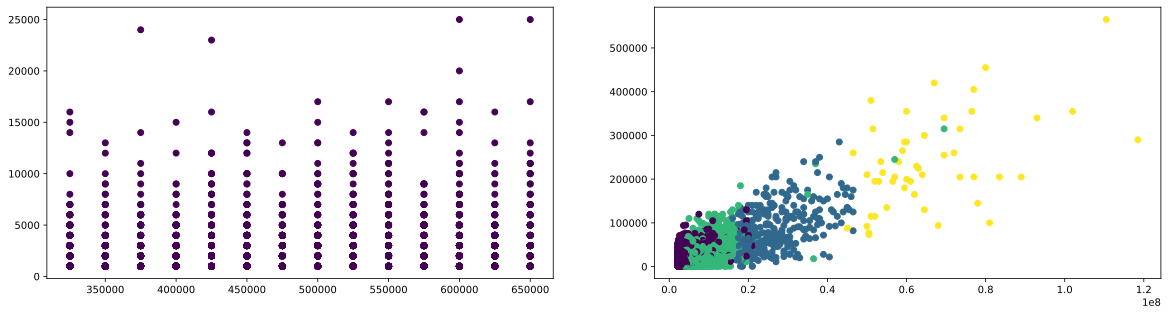

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(b['Value(€M)'],b['Wage(€K)'], c=b['labels'])
plt.subplot(1,2,2)
plt.scatter(d['Value(€M)'],d['Wage(€K)'], c=d['labels'])
plt.show()

In [28]:
#display(fifamach.groupby("labels").mean())
#display(fifamach.groupby("labels_DBSCAN").mean())

In [29]:
#from sklearn.cluster import KMeans
#fifamach2=fifamach.copy()
#n_clusters=[1,2,3,4,5,6,7,8]
#for e in n_clusters:
#    km=KMeans(e).fit(fifamach2[cols])
#    fifamach2['labels_{}'.format(e)]=km.labels_
#fifamach2.head()

In [30]:
'''#plt.figure(figsize=(20,20))
#plt.subplot(4,2,1)
#plt.scatter(fifamach['Club'],fifamach['Inter_Rep'], c=fifamach2['labels_1'])
#plt.title("1 CLUSTER")
#plt.subplot(4,2,2)
#plt.scatter(fifamach['Club'],fifamach['Inter_Rep'], c=fifamach2['labels_2'])
#plt.title("2 CLUSTERS")
#plt.subplot(4,2,3)
#plt.scatter(fifamach['Club'],fifamach['Inter_Rep'], c=fifamach2['labels_3'])
#plt.title("3 CLUSTERS")
#plt.subplot(4,2,4)
plt.scatter(fifamach['Club'],fifamach['Inter_Rep'], c=fifamach2['labels_4'])
plt.title("4 CLUSTERS")
plt.subplot(4,2,5)
plt.scatter(fifamach['Club'],fifamach['Inter_Rep'], c=fifamach2['labels_5'])
plt.title("5 CLUSTERS")
plt.subplot(4,2,6)
plt.scatter(fifamach['Club'],fifamach['Inter_Rep'], c=fifamach2['labels_6'])
plt.title("6 CLUSTERS")
plt.subplot(4,2,7)
plt.scatter(fifamach['Club'],fifamach['Inter_Rep'], c=fifamach2['labels_7'])
plt.title("7 CLUSTERS")
plt.subplot(4,2,8)
plt.scatter(fifamach['Club'],fifamach['Inter_Rep'], c=fifamach2['labels_8'])
plt.title("8 CLUSTERS")
plt.show()'''

'#plt.figure(figsize=(20,20))\n#plt.subplot(4,2,1)\n#plt.scatter(fifamach[\'Club\'],fifamach[\'Inter_Rep\'], c=fifamach2[\'labels_1\'])\n#plt.title("1 CLUSTER")\n#plt.subplot(4,2,2)\n#plt.scatter(fifamach[\'Club\'],fifamach[\'Inter_Rep\'], c=fifamach2[\'labels_2\'])\n#plt.title("2 CLUSTERS")\n#plt.subplot(4,2,3)\n#plt.scatter(fifamach[\'Club\'],fifamach[\'Inter_Rep\'], c=fifamach2[\'labels_3\'])\n#plt.title("3 CLUSTERS")\n#plt.subplot(4,2,4)\nplt.scatter(fifamach[\'Club\'],fifamach[\'Inter_Rep\'], c=fifamach2[\'labels_4\'])\nplt.title("4 CLUSTERS")\nplt.subplot(4,2,5)\nplt.scatter(fifamach[\'Club\'],fifamach[\'Inter_Rep\'], c=fifamach2[\'labels_5\'])\nplt.title("5 CLUSTERS")\nplt.subplot(4,2,6)\nplt.scatter(fifamach[\'Club\'],fifamach[\'Inter_Rep\'], c=fifamach2[\'labels_6\'])\nplt.title("6 CLUSTERS")\nplt.subplot(4,2,7)\nplt.scatter(fifamach[\'Club\'],fifamach[\'Inter_Rep\'], c=fifamach2[\'labels_7\'])\nplt.title("7 CLUSTERS")\nplt.subplot(4,2,8)\nplt.scatter(fifamach[\'Club\'],fifama